# Работу выполнили 
Студенты группы 4230М А.Н. Секунов, Д.А. Фомин.

# Задание
Дан многомерный набор данных телеметрической информации (ТМИ) малого
космического аппарата. Необходимо выполнить классификацию временного ряда
данных ТМИ на основе классификационных моделей по вариантам. Анализ
выполняется для исходного набора данных и преобразованного исходного набора
данных по варианту.  
Перед выполнением классификации необходимо выполнить предобработку
исходного набора данных:  
1) Удалить признаки:  
'RKPT,b','Sst0x,b','Sst1x,b','Ipt0,A','Mag0F','Mag10','Mag11','Mag12','Mag13','Mag14',
'Mag15','Mag16','Isp1,A','Isp2,A','Isp3,A','Isp4,A','Isp5,A','Isp6,A','Isp7,A','Isp8,A',
'Mag07','Mag08','Mag09','Mag0A','Mag0B','Mag0C','Mag0D','Mag0E','Mag03','Mag04',
'Mag05','Mag06','TDS11,C','TDS12,C','TDS14,C','TDS15,C','TDS17,C','TDS18,C','TDS20,C','TDS21,C',
'TDS23,C','iTMO,s','iTMD,s','U-chCAN','SSoTR,b','STDS12,b','STDS34,b','res0','U-MAG,o','U-KPT1,o',
'U-KPT2,o','UInfGBV','U-GBV,o','U-InfNAP','TmUpr,b','RKwit,b','Rmorz,b','IntK_TM','RPrd1,b','RPrm1,b',
'RPrd2,b','RPrm2,b','FPrd1,V','RPrd1,V','FPrd2,V','RPrd2,V','SPrm1,V','SPrm2,V','VP,d','ShKom,d',
'Kmnd,d','God,h','Mes,h','Den,h','Chas,h','Min,h','Sec'  

2) Заполнить пробелы (NaN) в признаках. Для заполнения использовать
значение признака, ближайшее по предыдущему моменту времени (или
меньшему индексу);  

3) Выполнить разметку данных по классам – добавить целевой признак меток
классов. Метка устанавливается для каждого вектора временного ряда
данных ТМИ. Данные размечать на три класса:  
a. 2 – класс сбоя функционирования, если в строках исходного excel
файла встречаются значения помеченные красным шрифтом, число
таких значений в строке > 1, число строк с отмеченными красным
шрифтом значениями, идущих подряд >=1 и <=3;  
b. 1 – класс отказа функционирования, если в строках исходного excel
файла встречаются значения помеченные красным шрифтом, число
таких значений в строке > 1, число строк с отмеченными красным
шрифтом значениями, идущих подряд > 3;  
c. 0 – класс штатного функционирования в остальных случаях.

Для работы с файлами данных ТМИ excel можно использовать пакеты openpyxl
и pandas.  
Результаты сравниваются и выбирается лучший вариант по модели и
анализируемому набору данных.  
Для выбранной комбинации набора данных и предиктивной модели
выполняется поиск гиперпараметров на обучающем и тестовом наборах.  
Сделать выводы по проведенному анализу.

# Исходные данные
Вариант 2.  
Файл V2*.xlsx  
a. Модель CART  
b. Random Forest  
c. Стандартизация  

# Выполнение работы
## Загрузка используемых пакетов библиотек

In [1]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, confusion_matrix, classification_report

FILENAME = r'V2RS41at_03.05.2014ТЗЧ.xlsx'
OUT_FILENAME = r'outputV2.xlsx'
TREE_COUNT = 25 # Для RandomForest

## Загрузка исходных данных

In [2]:
# Перечень столбцов на исключение
exclude = [
    'RKPT,b','Sst0x,b','Sst1x,b','Ipt0,A','Mag0F','Mag10','Mag11','Mag12','Mag13','Mag14',
    'Mag15','Mag16','Isp1,A','Isp2,A','Isp3,A','Isp4,A','Isp5,A','Isp6,A','Isp7,A','Isp8,A',
    'Mag07','Mag08','Mag09','Mag0A','Mag0B','Mag0C','Mag0D','Mag0E','Mag03','Mag04',
    'Mag05','Mag06','TDS11,C','TDS12,C','TDS14,C','TDS15,C','TDS17,C','TDS18,C','TDS20,C','TDS21,C',
    'TDS23,C','iTMO,s','iTMD,s','U-chCAN','SSoTR,b','STDS12,b','STDS34,b','res0','U-MAG,o','U-KPT1,o',
    'U-KPT2,o','UInfGBV','U-GBV,o','U-InfNAP','TmUpr,b','RKwit,b','Rmorz,b','IntK_TM','RPrd1,b','RPrm1,b',
    'RPrd2,b','RPrm2,b','FPrd1,V','RPrd1,V','FPrd2,V','RPrd2,V','SPrm1,V','SPrm2,V','VP,d','ShKom,d',
    'Kmnd,d','God,h','Mes,h','Den,h','Chas,h','Min,h','Sec','Unnamed: 0'
]
read_data = pd.read_excel(FILENAME, usecols=lambda x: x not in exclude)
read_data.head()

,"Ubs,V","Ibs,A","Isun,A","Ipt1,A","Ipt2,A","Ipt3,A","Ipt4,A","Ipt5,A","Ipt6,A","Ipt7,A",...,"TDS7,C","TDS8,C","TDS9,C","TKpt,C","TGbv,C","TNap,C","TPrd2,C","TPrd1,C","TDS24,C",U-InfGBV
0,14.69,0.21,1.31,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,25.0,17.0,17.0,17.0,17.0,20.0,700.0
1,14.63,0.24,0.61,0.07,0.07,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,25.0,17.0,17.0,17.0,17.0,20.0,700.0
2,14.56,0.21,0.37,0.04,0.07,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,25.0,17.0,17.0,17.0,17.0,20.0,700.0
3,14.63,0.21,0.67,0.07,0.09,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,25.0,17.0,17.0,16.0,17.0,20.0,700.0
4,14.69,0.24,0.80,0.09,0.07,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,25.0,17.0,17.0,16.0,16.0,20.0,700.0


In [3]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ubs,V     1287 non-null   float64
 1   Ibs,A     1302 non-null   float64
 2   Isun,A    1292 non-null   float64
 3   Ipt1,A    1289 non-null   float64
 4   Ipt2,A    1294 non-null   float64
 5   Ipt3,A    1317 non-null   float64
 6   Ipt4,A    1309 non-null   float64
 7   Ipt5,A    1311 non-null   float64
 8   Ipt6,A    1317 non-null   float64
 9   Ipt7,A    1322 non-null   float64
 10  Ipt10,A   1311 non-null   float64
 11  Ipt11,A   1308 non-null   float64
 12  Ipt12,A   1306 non-null   float64
 13  Ipt13,A   1306 non-null   float64
 14  Ipt14,A   1308 non-null   float64
 15  Ipt15,A   1307 non-null   float64
 16  Ipt16,A   1320 non-null   float64
 17  Ipt17,A   1295 non-null   float64
 18  TR1,C     1260 non-null   float64
 19  TR2,C     1254 non-null   float64
 20  TR3,C     1269 non-null   floa

## Заполнение по предыдущим непустым значениям

In [4]:
data = read_data.ffill()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ubs,V     1402 non-null   float64
 1   Ibs,A     1402 non-null   float64
 2   Isun,A    1402 non-null   float64
 3   Ipt1,A    1402 non-null   float64
 4   Ipt2,A    1402 non-null   float64
 5   Ipt3,A    1402 non-null   float64
 6   Ipt4,A    1402 non-null   float64
 7   Ipt5,A    1402 non-null   float64
 8   Ipt6,A    1402 non-null   float64
 9   Ipt7,A    1402 non-null   float64
 10  Ipt10,A   1402 non-null   float64
 11  Ipt11,A   1402 non-null   float64
 12  Ipt12,A   1402 non-null   float64
 13  Ipt13,A   1402 non-null   float64
 14  Ipt14,A   1402 non-null   float64
 15  Ipt15,A   1402 non-null   float64
 16  Ipt16,A   1402 non-null   float64
 17  Ipt17,A   1402 non-null   float64
 18  TR1,C     1402 non-null   float64
 19  TR2,C     1402 non-null   float64
 20  TR3,C     1402 non-null   floa

## Разметка данных по классам

Формируется вектор failure, который будет содержать значения от 0 до 2. Значение 2 будет говорить о том, что было обнаружено 2 или более неисправностей в параметрах (> 1).

In [6]:
failure = pd.Series(index=data.index, dtype='float64')
failure[:] = 0;
in_wb = openpyxl.load_workbook(FILENAME)
out_wb = openpyxl.Workbook() # Формирование 2-го файла, для проверки результатов
in_lst = in_wb[in_wb.sheetnames[0]]
out_lst = out_wb[out_wb.sheetnames[0]]
for i in range(1, in_lst.max_row):
    h = 0
    for j in range(1, in_lst.max_column): 
        if in_lst.cell(row=1, column=j).value in data.columns:
            h += 1
            # Просмотр по текущий i-ой строке
            cell = in_lst.cell(row=i, column=j)
            # Если нашли пустую ячейку, то поднимаемся вверх
            if cell.value is None:
                for k in range(i, 1, -1):
                    cell = in_lst.cell(row=k, column=j)
                    if cell.value is not None:
                        break; 
            out_lst.cell(row=i, column=h).value = cell.value
            isFailure = (cell.font.color.index == 'FFFF0000')
            if isFailure:
                if failure.iloc[i-2] < 2:
                    failure.iloc[i-2] += 1
                out_lst.cell(row=i, column=h).font = openpyxl.styles.Font(name='Calibri', charset=204, family=2.0, b=False, color='FFFF0000', sz=11.0)

Разметку требуется осуществлять по правилу:
<table style='text-align: center'>
<tr><th>Число смежных строк<br> с более чем 1 ошибкой<th/><th>Класс<th/><th>Тип<th/><tr/>
<tr><td> ≥1 и ≤3<td/><td>2<td/><td>Сбой<td/><tr/>
<tr><td> &gt;3<td/><td>1<td/><td>Отказ<td/><tr/>
<tr><td>0<td/><td>0<td/><td>Штатное<br>функционирование<td/><tr/>
</table>

* Вариант №1. Данные идут поступательно, мы не можем сразу отличить сбой от отказа, например:

<table style='text-align: center'>
<tr><th>№<th/><th>failure<th/><th>Класс<th/><tr/>
<tr><td>1<td/><td>0<td/><td>0<td/><tr/>
<tr><td>2<td/><td>2<td/><td>2<td/><tr/>
<tr><td>3<td/><td>2<td/><td>2<td/><tr/>
<tr><td>4<td/><td>2<td/><td>2<td/><tr/>
<tr><td>5<td/><td>2<td/><td>1<td/><tr/>
<tr><td>6<td/><td>0<td/><td>0<td/><tr/>
</table>

* Вариант №2. Используем полное знание о данных, назначение классов выполняется блоками, например:

<table style='text-align: center'>
<tr><th>№<th/><th>failure<th/><th>Класс<th/><tr/>
<tr><td>1<td/><td>0<td/><td>0<td/><tr/>
<tr><td>2<td/><td>2<td/><td>1<td/><tr/>
<tr><td>3<td/><td>2<td/><td>1<td/><tr/>
<tr><td>4<td/><td>2<td/><td>1<td/><tr/>
<tr><td>5<td/><td>2<td/><td>1<td/><tr/>
<tr><td>6<td/><td>0<td/><td>0<td/><tr/>
</table>

In [7]:
def set_Y(count, Y, i, j=None):
    if j is None: j = i + 1
    if count == 0:
        Y[i:j] = 0
    elif count >= 1 and count <= 3:
        Y[i:j] = 2
    else:
        Y[i:j] = 1

Вычисление по варинту №1:

In [8]:
Y1 = pd.Series(index=data.index, dtype='float64')
count = 0;
for i, f in enumerate(failure):
    if f == 2:
        count += 1
    else:
        count = 0
    set_Y(count, Y1, i);

Вычисление по варинту №2:

In [9]:
Y2 = pd.Series(index=data.index, dtype='float64')
first = 0
count = 0;
for i, f in enumerate(failure):
    if f == 2:
        if first == 0:
            first = i
        count += 1
    elif f < 2 and first != 0:
        set_Y(count, Y2, first, i);
        Y2[i] = 0;
        first = 0
        count = 0
    else:
        Y2[i] = 0;
if first != 0:
    set_Y(count, Y2, first, failure.size);

Сохранение результатов в файл

In [10]:
N1 = data.shape[1] + 1
N2 = data.shape[1] + 2
out_lst.cell(row=1, column=N1).value = 'Y1'
out_lst.cell(row=1, column=N2).value = 'Y2'
i = 2
for y1, y2 in zip(Y1, Y2):
    out_lst.cell(row=i, column=N1).value = y1
    out_lst.cell(row=i, column=N2).value = y2
    i += 1
out_wb.save(OUT_FILENAME) 

## Стандартизация

In [11]:
scaler = StandardScaler().fit(data)
sdata = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

## Выделение обучающей и тестовой выборки  
Выделим тестовую выборку как 20% от исходной, остальные 80% составят обучающую вуборку.
Исползуем заданное начальное значение для параметра ```random_state```, чтобы получать одни и те же обучающию и тестовую выборки при повторном запуске

In [12]:
validation_size = 0.2
seed = 7
# Исходные и стандартизированные данные с Y по варианту №1
X_train_d1, X_test_d1, Y_train_d1, Y_test_d1 = train_test_split(data,  Y1, test_size=validation_size, random_state=seed)
X_train_s1, X_test_s1, Y_train_s1, Y_test_s1 = train_test_split(sdata, Y1, test_size=validation_size, random_state=seed)
# Исходные и стандартизированные данные с Y по варианту №2
X_train_d2, X_test_d2, Y_train_d2, Y_test_d2 = train_test_split(data,  Y2, test_size=validation_size, random_state=seed)
X_train_s2, X_test_s2, Y_train_s2, Y_test_s2 = train_test_split(sdata, Y2, test_size=validation_size, random_state=seed)

## Обоснование выбора метрик

Подсчитаем количество состояний для указанного класса. Также для проверки корректности вычислим их общую сумму, которая должна совпасть с объемом выборки. 

In [13]:
temp = [0, 0]
sumY = pd.DataFrame(columns=['Y1', 'Y2'])
for i in range(3):
    s1, s2 = Y1[Y1 == i].size, Y2[Y2 == i].size
    sumY.loc[i] = [s1, s2]
    temp[0] += s1
    temp[1] += s2
sumY.loc['sum'] = temp
sumY

,Y1,Y2
0,1172,1172
1,145,181
2,85,49
sum,1402,1402


Как видно по таблице метки распределены не сбалансировано, а значит брать критерий Accuracy не рекомендуется, однако можно использовать Balanced_accuracy, что позволяет избежать завышенных 
оценок качества модели классификатора на несбалансированных данных.  
Также дополнительно было решено взять критерии Recall и Precision, так как они не зависит от соотношения классов и потому применимы в условиях несбалансированных выборок.

## Предварительный Grid-поиск

In [14]:
quality_columns = ['recall', 'precision', 'balanced_accuracy']

def print_quality(mq):
    mr = mq.index[mq['recall'].argmax()]
    mp = mq.index[mq['precision'].argmax()]
    mb = mq.index[mq['balanced_accuracy'].argmax()]
    print(f'max(recall) = {mr} = {mq["recall"][mr]:.6f}')
    print(f'max(precision) = {mp} = {mq["precision"][mp]:.6f}')
    print(f'max(balanced_accuracy) = {mb} = {mq["balanced_accuracy"][mb]:.6f}')

def evaluate_model(name, model, mq, X_train, Y_train, X_test=None, Y_test=None, is_show_info=True):
    if X_test is None: X_test = X_train
    if Y_test is None: Y_test = Y_train
    # Построение модели
    model.fit(X_train, Y_train.values.ravel())
    Y_pred = model.predict(X_test)
    # Расчёт критериев качества   
    recall = recall_score(Y_test, Y_pred, average='macro')
    precision = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
    balanced_accuracy = balanced_accuracy_score(Y_test, Y_pred)
    mq.loc[name] = [recall, precision, balanced_accuracy]
    if is_show_info:
        print('Confusion matrix:')
        print(confusion_matrix(Y_test, Y_pred))
        print('Classification report:')
        print(classification_report(Y_test, Y_pred))

model_args = [
    'max_depth', # максимальная глубина дерева
    'min_samples_split', # минимальное число образцов, которые должны присутствовать в узле, прежде чем его можно будет расщепить
    'min_samples_leaf', # минимальное количество образцов, которое должен иметь листовой узел
    'max_leaf_nodes', # максимальное количество листовых узлов
    'max_features', # максимальное число признаков, которые оцениваются при расщеплении каждого узла
]

def draw_quality(title, modelClass, X_train, Y_train, X_test=None, Y_test=None, N=51, **args):
    if X_test is None: X_test = X_train
    if Y_test is None: Y_test = Y_train
    model_quality = dict.fromkeys(model_args,  None)
    # Сбор оценок для каждого параметра со значениями от 2 до N
    for arg in model_args:
        d = dict.fromkeys([arg], None)
        model_quality[arg] = pd.DataFrame(columns=quality_columns)
        for i in range(2, N):
            d[arg] = i
            model = modelClass(random_state=25, **d, **args)
            evaluate_model(i, model, model_quality[arg],
                X_train, Y_train, X_test, Y_test, is_show_info=False)

    # Подсчёт, сколько раз каждый параметр был "выше" всех 
    quality_table = dict.fromkeys(quality_columns + ['sum'],  None)
    rank = [i for i in range(len(model_args) - 1, -1, -1)]
    for quality in quality_columns: # Для каждого критерия
        qt = pd.DataFrame(columns=model_args) 
        for arg in model_args:
            qt[arg] = model_quality[arg][quality]    
        for i in qt.index:
            j = qt.T[i].argsort()
            qt.T[i][j] = rank
        quality_table[quality] = pd.DataFrame(index=model_args, columns=['first', 'second'])
        quality_table[quality]['first'] = qt[qt == 0].count()
        quality_table[quality]['second'] = qt[qt == 1].count()

         # Построение графика 
        fig = plt.figure(figsize=(10, 3))
        ax = fig.add_subplot(1, 1, 1)
        for arg in model_args:
            model_quality[arg].plot(ax=ax, y=quality, label=arg)
        ax.set_title(title)
        ax.set_xlabel('Величина параметра');
        ax.set_ylabel(quality);

    # Суммирование
    quality_table['sum'] = quality_table[quality_columns[0]].copy()
    for qc in quality_columns[1:]:
        quality_table['sum'] += quality_table[qc]
    return quality_table

def print_quality_table(qt):
    html = ''
    for quality in quality_columns:
        html += f'<div style="display:inline-block; margin-right: 50px"><h5>{quality}</h5>{qt[quality].to_html()}</div>'
    html += f'<div><h5>Суммирование</h5>{qt["sum"].to_html()}</div>'
    display(HTML(html))

#### Модель CART_d1 - исходный набор по варианту №1

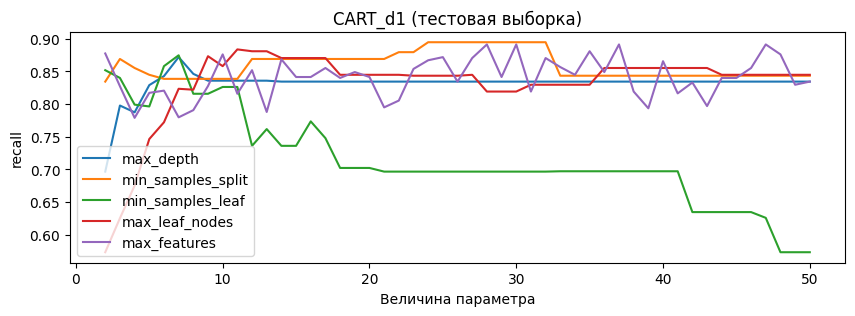

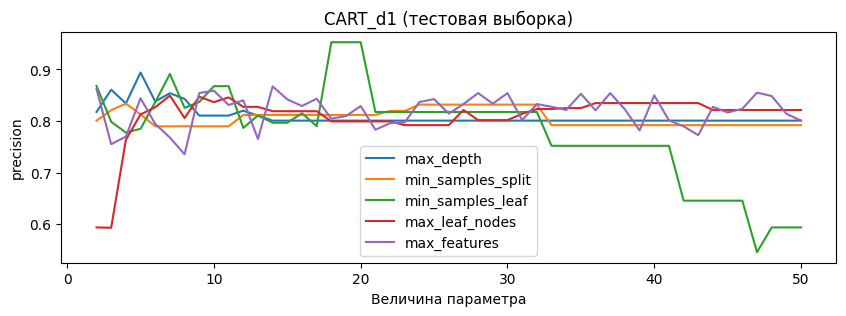

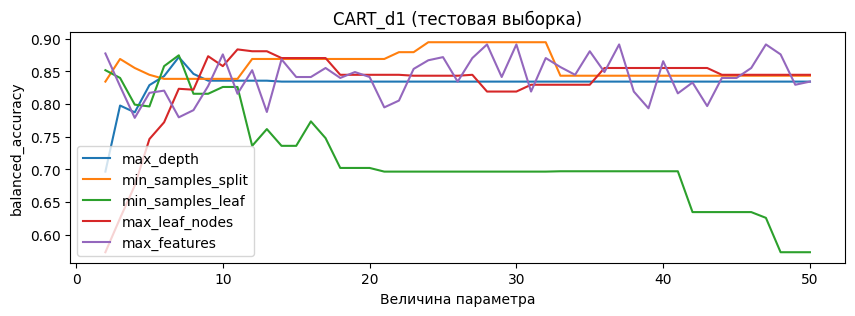

In [15]:
CART_d1_qt = draw_quality('CART_d1 (тестовая выборка)', DecisionTreeClassifier, X_train_d1, Y_train_d1, X_test_d1, Y_test_d1)

In [16]:
print_quality_table(CART_d1_qt)

,first,second
max_depth,1,4
min_samples_split,18,21
min_samples_leaf,2,3
max_leaf_nodes,18,11
max_features,10,10
,first,second
max_depth,5,4
min_samples_split,4,13
min_samples_leaf,8,6
max_leaf_nodes,11,15


Исходя из полученных результатов, можно сделать вывод, что для модели ```CART_d1``` в качестве гиперпараметров могуть быть выбраны: ```max_leaf_nodes``` (так как суммарно он достигал максимального значения ```44``` раза) и ```min_samples_split``` (также как и ```max_features```, достигал максимального значения около ```40``` раз, но при этом ```55``` раза он был следующим, после максимального).

Исходя из графиков, интервал поиска значений для параметра ```max_leaf_nodes``` (красный) составляет ```[9; 45]```, для ```min_samples_split``` (оранжевый) - ```[12; 32]```.

#### Модель CART_d2 - исходный набор по варианту №2

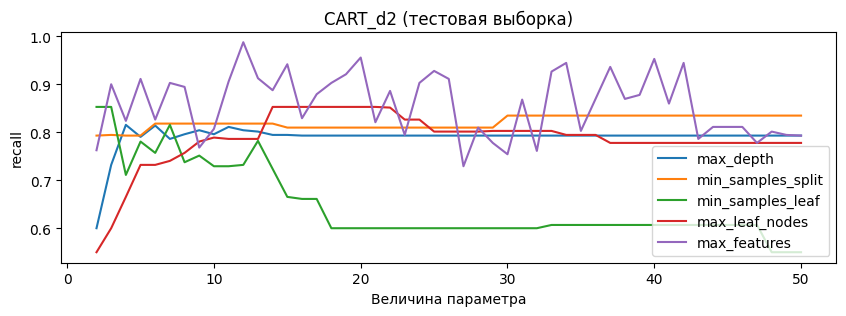

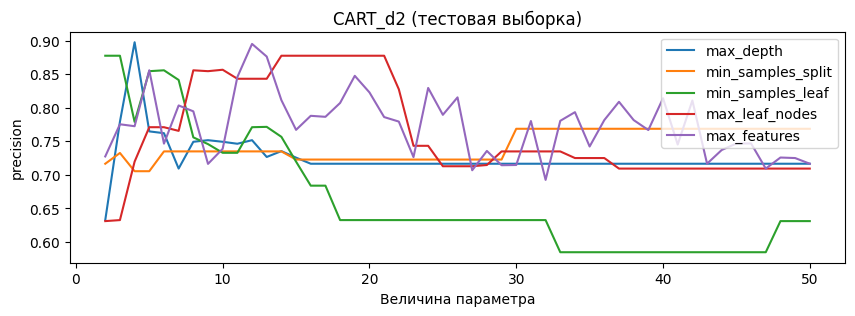

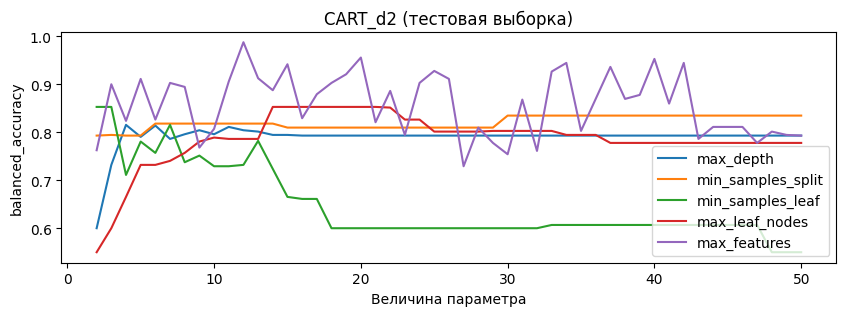

In [17]:
CART_d2_qt = draw_quality('CART_d2 (тестовая выборка)', DecisionTreeClassifier, X_train_d2, Y_train_d2, X_test_d2, Y_test_d2)

In [18]:
print_quality_table(CART_d2_qt)

,first,second
max_depth,0,4
min_samples_split,15,22
min_samples_leaf,1,1
max_leaf_nodes,3,12
max_features,30,10
,first,second
max_depth,1,5
min_samples_split,14,12
min_samples_leaf,4,2
max_leaf_nodes,14,7


Гиперпараметры для модели CART_d2: ```max_features``` (фиолетовый) ```[12; 42]```, ```min_samples_split``` (оранжевый) ```[6; 50]```.

#### Модель RF_d1 - исходный набор по варианту №1

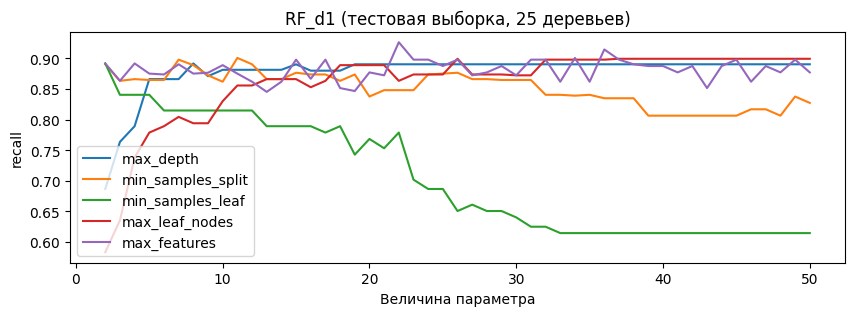

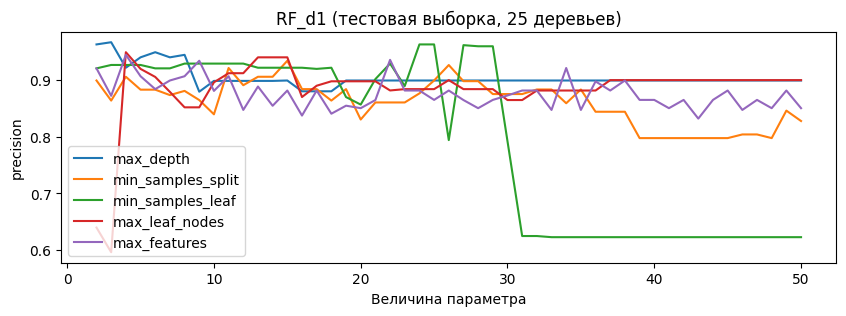

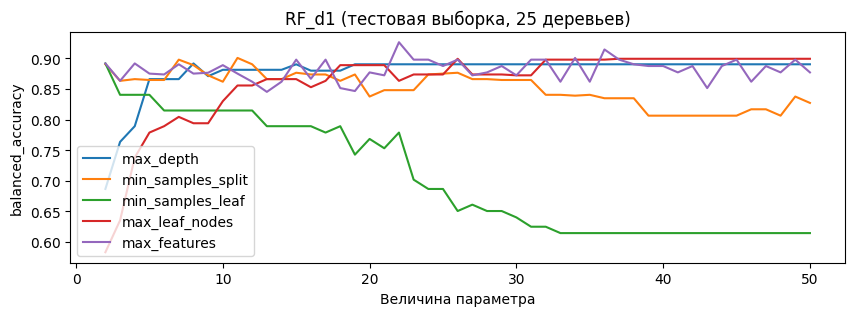

In [19]:
RF_d1_qt = draw_quality(f'RF_d1 (тестовая выборка, {TREE_COUNT} деревьев)', RandomForestClassifier, X_train_d1, Y_train_d1, X_test_d1, Y_test_d1, n_estimators=TREE_COUNT)

In [20]:
print_quality_table(RF_d1_qt)

,first,second
max_depth,12,24
min_samples_split,3,5
min_samples_leaf,0,1
max_leaf_nodes,18,9
max_features,16,10
,first,second
max_depth,15,20
min_samples_split,1,8
min_samples_leaf,12,10
max_leaf_nodes,18,6


Гиперпараметры для модели RF_d1: ```max_leaf_nodes``` (красный) ```[18; 50]```, ```max_depth``` (синий) ```[4; 50]```.

#### Модель RF_d2 - исходный набор по варианту №2

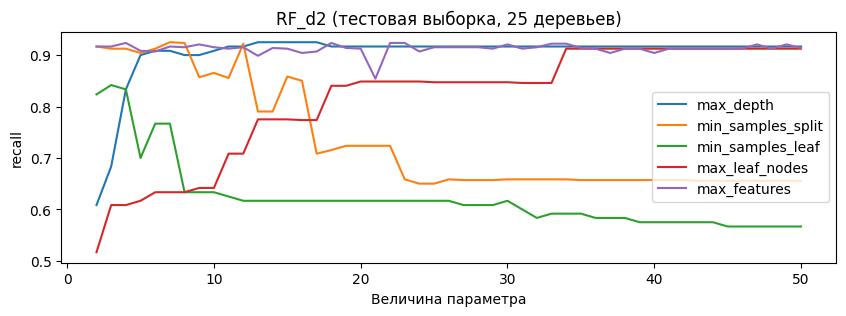

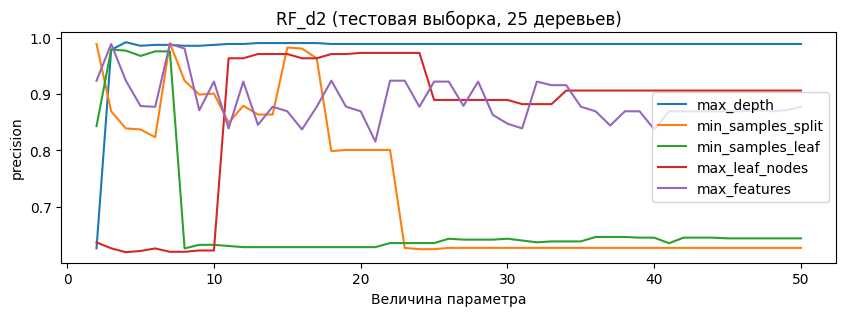

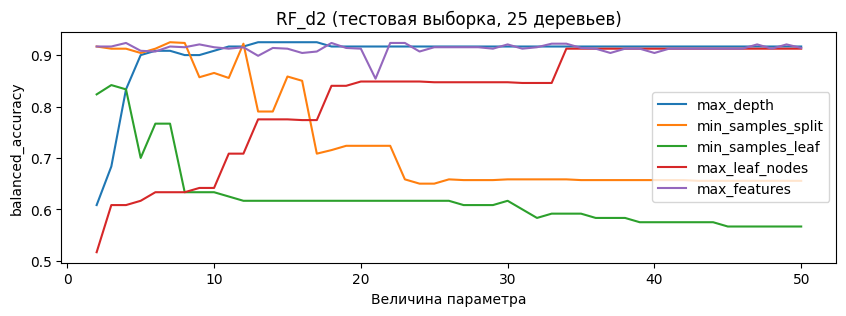

In [21]:
RF_d2_qt = draw_quality(f'RF_d2 (тестовая выборка, {TREE_COUNT} деревьев)', RandomForestClassifier, X_train_d2, Y_train_d2, X_test_d2, Y_test_d2, n_estimators=TREE_COUNT)

In [22]:
print_quality_table(RF_d2_qt)

,first,second
max_depth,31,12
min_samples_split,4,4
min_samples_leaf,0,0
max_leaf_nodes,0,2
max_features,14,31
,first,second
max_depth,46,0
min_samples_split,2,4
min_samples_leaf,0,4
max_leaf_nodes,0,31


Гиперпараметры для модели RF_d2: ```max_depth``` (синий) ```[5; 50]```, ```max_features``` (фиолетовый) ```[3; 35]```.

## Запуск моделей на обучающих данных

In [23]:
# Для хранения оценок по моделям
model_quality1 = pd.DataFrame(columns=quality_columns)
model_quality2 = pd.DataFrame(columns=quality_columns)
# Модель CART 
CART_model1 = DecisionTreeClassifier(max_leaf_nodes=15, min_samples_split=30, random_state=25)
CART_model2 = DecisionTreeClassifier(max_features=12, min_samples_split=40, random_state=25)
# Random Forest
RF_model1 = RandomForestClassifier(max_leaf_nodes=40, max_depth=30, random_state=25, n_estimators=TREE_COUNT)
RF_model2 = RandomForestClassifier(max_depth=15, max_features=22, random_state=25, n_estimators=TREE_COUNT)

#### Модель CART_d1 - исходный набор по варианту №1

In [24]:
evaluate_model('CART_d1', CART_model1, model_quality1, X_train_d1, Y_train_d1)

Confusion matrix:
[[933   0   3]
 [  1  98  14]
 [  4   9  59]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       936
         1.0       0.92      0.87      0.89       113
         2.0       0.78      0.82      0.80        72

    accuracy                           0.97      1121
   macro avg       0.90      0.89      0.89      1121
weighted avg       0.97      0.97      0.97      1121



#### Модель CART_s1 - стандартизованный набор по варианту №1

In [25]:
evaluate_model('CART_s1', CART_model1, model_quality1, X_train_s1, Y_train_s1)

Confusion matrix:
[[933   0   3]
 [  1  98  14]
 [  4   9  59]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       936
         1.0       0.92      0.87      0.89       113
         2.0       0.78      0.82      0.80        72

    accuracy                           0.97      1121
   macro avg       0.90      0.89      0.89      1121
weighted avg       0.97      0.97      0.97      1121



#### Модель RF_d1 - исходный набор по варианту №1

In [26]:
evaluate_model('RF_d1', RF_model1, model_quality1, X_train_d1, Y_train_d1)

Confusion matrix:
[[936   0   0]
 [  0 111   2]
 [  3   0  69]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       936
         1.0       1.00      0.98      0.99       113
         2.0       0.97      0.96      0.97        72

    accuracy                           1.00      1121
   macro avg       0.99      0.98      0.98      1121
weighted avg       1.00      1.00      1.00      1121



#### Модель RF_s1 - стандартизованный набор по варианту №1

In [27]:
evaluate_model('RF_s1', RF_model1, model_quality1, X_train_s1, Y_train_s1)

Confusion matrix:
[[936   0   0]
 [  0 111   2]
 [  3   0  69]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       936
         1.0       1.00      0.98      0.99       113
         2.0       0.97      0.96      0.97        72

    accuracy                           1.00      1121
   macro avg       0.99      0.98      0.98      1121
weighted avg       1.00      1.00      1.00      1121



#### Модель CART_d2 - исходный набор по варианту №2

In [28]:
evaluate_model('CART_d2', CART_model2, model_quality2, X_train_d2, Y_train_d2)

Confusion matrix:
[[930   0   6]
 [  1 129  11]
 [  1  11  32]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       936
         1.0       0.92      0.91      0.92       141
         2.0       0.65      0.73      0.69        44

    accuracy                           0.97      1121
   macro avg       0.86      0.88      0.87      1121
weighted avg       0.97      0.97      0.97      1121



#### Модель CART_s2 - стандартизованный набор по варианту №2

In [29]:
evaluate_model('CART_s2', CART_model2, model_quality2, X_train_s2, Y_train_s2)

Confusion matrix:
[[930   0   6]
 [  1 129  11]
 [  1  11  32]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       936
         1.0       0.92      0.91      0.92       141
         2.0       0.65      0.73      0.69        44

    accuracy                           0.97      1121
   macro avg       0.86      0.88      0.87      1121
weighted avg       0.97      0.97      0.97      1121



#### Модель RF_d2 - исходный набор по варианту №2

In [30]:
evaluate_model('RF_d2', RF_model2, model_quality2, X_train_d2, Y_train_d2)

Confusion matrix:
[[936   0   0]
 [  0 141   0]
 [  0   0  44]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       936
         1.0       1.00      1.00      1.00       141
         2.0       1.00      1.00      1.00        44

    accuracy                           1.00      1121
   macro avg       1.00      1.00      1.00      1121
weighted avg       1.00      1.00      1.00      1121



#### Модель RF_s2 - стандартизованный набор по варианту №2

In [31]:
evaluate_model('RF_s2', RF_model2, model_quality2, X_train_s2, Y_train_s2)

Confusion matrix:
[[936   0   0]
 [  0 141   0]
 [  0   0  44]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       936
         1.0       1.00      1.00      1.00       141
         2.0       1.00      1.00      1.00        44

    accuracy                           1.00      1121
   macro avg       1.00      1.00      1.00      1121
weighted avg       1.00      1.00      1.00      1121



#### Сравнительные таблицы
Для варианта №1:

In [32]:
print_quality(model_quality1)
model_quality1.T

max(recall) = RF_d1 = 0.980211
max(precision) = RF_d1 = 0.989545
max(balanced_accuracy) = RF_d1 = 0.980211


,CART_d1,CART_s1,RF_d1,RF_s1
recall,0.894499,0.894499,0.980211,0.980211
precision,0.895624,0.895624,0.989545,0.989545
balanced_accuracy,0.894499,0.894499,0.980211,0.980211


Для варианта №2:

In [33]:
print_quality(model_quality2)
model_quality2.T

max(recall) = RF_d2 = 1.000000
max(precision) = RF_d2 = 1.000000
max(balanced_accuracy) = RF_d2 = 1.000000


,CART_d2,CART_s2,RF_d2,RF_s2
recall,0.878585,0.878585,1.0,1.0
precision,0.857448,0.857448,1.0,1.0
balanced_accuracy,0.878585,0.878585,1.0,1.0


Исходные и стандартизированные выборки имеют одинаковые значения метрик для моделей CART и RF соответсвенно, в обоих вариантах лучше моделью является RandomForest. Выполним поиcк по сетке гиперпараметров для этих моделей 1 и 2 варианта.

## Grid-поиск

In [34]:
def RF1_grid_search(X_train, Y_train, X_test=None, Y_test=None):
    if X_test is None: X_test = X_train
    if Y_test is None: Y_test = Y_train
    # По предварительным данным: max_leaf_nodes[18; 50] и max_depth[4; 50]
    arr_mln = [i for i in range(20, 51, 5)]
    arr_md = [i for i in range(5, 51, 5)]
    model_quality = pd.DataFrame(columns=quality_columns)
    for mln in arr_mln:
        for md in arr_md:
            model = RandomForestClassifier(max_leaf_nodes=mln, max_depth=md, random_state=25, n_estimators=TREE_COUNT)
            evaluate_model(f'RF[max_leaf_nodes={mln}, max_depth={md}]', model, model_quality,
                           X_train, Y_train, X_test, Y_test, is_show_info=False)
    print_quality(model_quality)
    return model_quality

def RF2_grid_search(X_train, Y_train, X_test=None, Y_test=None):
    if X_test is None: X_test = X_train
    if Y_test is None: Y_test = Y_train
    # По предварительным данным: max_depth[5; 50] max_features[3; 35]
    arr_md = [i for i in range(5, 51, 5)]
    arr_mf = [i for i in range(5, 36, 5)]
    model_quality = pd.DataFrame(columns=quality_columns)
    for md in arr_md:
        for mf in arr_mf:
            model = RandomForestClassifier(max_depth=md, max_features=mf, random_state=25, n_estimators=TREE_COUNT)
            evaluate_model(f'RF[max_depth={md}, max_features={mf}]', model, model_quality,
                           X_train, Y_train, X_test, Y_test, is_show_info=False)
    print_quality(model_quality)
    return model_quality

### Grid-поиск для RandomForest (RF-модели) по варианту №1
#### Обучающие исходные данные (RF_d1)

In [35]:
RF1_grid_search(X_train_d1, Y_train_d1)

max(recall) = RF[max_leaf_nodes=50, max_depth=20] = 0.994100
max(precision) = RF[max_leaf_nodes=50, max_depth=20] = 0.990991
max(balanced_accuracy) = RF[max_leaf_nodes=50, max_depth=20] = 0.994100


,recall,precision,balanced_accuracy
"RF[max_leaf_nodes=20, max_depth=5]",0.862750,0.956747,0.862750
"RF[max_leaf_nodes=20, max_depth=10]",0.911586,0.952298,0.911586
"RF[max_leaf_nodes=20, max_depth=15]",0.920846,0.953941,0.920846
"RF[max_leaf_nodes=20, max_depth=20]",0.920846,0.953941,0.920846
"RF[max_leaf_nodes=20, max_depth=25]",0.920846,0.953941,0.920846
...,...,...,...
"RF[max_leaf_nodes=50, max_depth=30]",0.994100,0.990991,0.994100
"RF[max_leaf_nodes=50, max_depth=35]",0.994100,0.990991,0.994100
"RF[max_leaf_nodes=50, max_depth=40]",0.994100,0.990991,0.994100
"RF[max_leaf_nodes=50, max_depth=45]",0.994100,0.990991,0.994100


#### Тестовые исходные данные (RF_d1)

In [36]:
RF1_grid_search(X_train_d1, Y_train_d1, X_test_d1, Y_test_d1)

max(recall) = RF[max_leaf_nodes=40, max_depth=20] = 0.899419
max(precision) = RF[max_leaf_nodes=20, max_depth=5] = 0.934542
max(balanced_accuracy) = RF[max_leaf_nodes=40, max_depth=20] = 0.899419


,recall,precision,balanced_accuracy
"RF[max_leaf_nodes=20, max_depth=5]",0.840545,0.934542,0.840545
"RF[max_leaf_nodes=20, max_depth=10]",0.837720,0.872239,0.837720
"RF[max_leaf_nodes=20, max_depth=15]",0.889002,0.897352,0.889002
"RF[max_leaf_nodes=20, max_depth=20]",0.889002,0.897352,0.889002
"RF[max_leaf_nodes=20, max_depth=25]",0.889002,0.897352,0.889002
...,...,...,...
"RF[max_leaf_nodes=50, max_depth=30]",0.899419,0.899419,0.899419
"RF[max_leaf_nodes=50, max_depth=35]",0.899419,0.899419,0.899419
"RF[max_leaf_nodes=50, max_depth=40]",0.899419,0.899419,0.899419
"RF[max_leaf_nodes=50, max_depth=45]",0.899419,0.899419,0.899419


#### Результат для исходных данных (RF_d1)

Для модели RandomForest варианта №1 GRID-поиск показал, что для обучающих данных лучше подходят параметры ```max_leaf_nodes=50``` и ```max_depth=20```, для тестовых данных ```max_leaf_nodes=20``` и ```max_depth=5```.

### Grid-поиск для RandomForest (RF-модели) №2
#### Обучающие исходные данные (RF_d2)

In [37]:
RF2_grid_search(X_train_d2, Y_train_d2)

max(recall) = RF[max_depth=15, max_features=15] = 1.000000
max(precision) = RF[max_depth=15, max_features=15] = 1.000000
max(balanced_accuracy) = RF[max_depth=15, max_features=15] = 1.000000


,recall,precision,balanced_accuracy
"RF[max_depth=5, max_features=5]",0.810176,0.983853,0.810176
"RF[max_depth=5, max_features=10]",0.835268,0.987419,0.835268
"RF[max_depth=5, max_features=15]",0.865087,0.989499,0.865087
"RF[max_depth=5, max_features=20]",0.855147,0.990991,0.855147
"RF[max_depth=5, max_features=25]",0.880239,0.990179,0.880239
...,...,...,...
"RF[max_depth=50, max_features=15]",1.000000,1.000000,1.000000
"RF[max_depth=50, max_features=20]",1.000000,1.000000,1.000000
"RF[max_depth=50, max_features=25]",1.000000,1.000000,1.000000
"RF[max_depth=50, max_features=30]",1.000000,1.000000,1.000000


#### Тестовые исходные данные (RF_d2)

In [38]:
RF2_grid_search(X_train_d2, Y_train_d2, X_test_d2, Y_test_d2)

max(recall) = RF[max_depth=10, max_features=30] = 0.923588
max(precision) = RF[max_depth=15, max_features=10] = 0.988652
max(balanced_accuracy) = RF[max_depth=10, max_features=30] = 0.923588


,recall,precision,balanced_accuracy
"RF[max_depth=5, max_features=5]",0.766667,0.975541,0.766667
"RF[max_depth=5, max_features=10]",0.833333,0.976901,0.833333
"RF[max_depth=5, max_features=15]",0.900000,0.985435,0.900000
"RF[max_depth=5, max_features=20]",0.898588,0.918746,0.898588
"RF[max_depth=5, max_features=25]",0.891667,0.918519,0.891667
...,...,...,...
"RF[max_depth=50, max_features=15]",0.912429,0.869385,0.912429
"RF[max_depth=50, max_features=20]",0.912429,0.869385,0.912429
"RF[max_depth=50, max_features=25]",0.915254,0.921973,0.915254
"RF[max_depth=50, max_features=30]",0.920763,0.847385,0.920763


#### Результат для исходных данных (RF_d2)

Для модели RandomForest варианта №2 GRID-поиск показал, что для обучающих данных лучше подходят параметры ```max_depth=15``` и ```max_features=15```, а для тестовых данных ```max_depth=15``` и ```max_features=10```.

# Выводы:
В ходе выполнения лабораторной работы выполнена классификация временного ряда данных ТМИ на основе классификационных моделей CART (DecisionTreeClassifier) и Random Forest (RandomForestClassifier).  
Предварительно были заполнены пустые поля значения на основе предыдущих и создан дополнительный набор стандартизированных данных.  
Выполнена разметка данных для класса в двух вариантах:  
1) последовательного назначения меток класса;
2) назначение меток класса блоком.

Для обоих вариантов были сформированы обучающие и тестовые наборы по стандартизированным и нестандартизированным данным, их результаты получились одинаковыми.  
Произведен расчёт критериев качества. В обоих случаях лучшей моделью является RandomForest. Выполнен GRID-поиск:  
- для обучающих данных (RF_d1):  
    ```max_leaf_nodes=50``` и ```max_depth=20``` (recall=0.99, precision=0.99, balanced_accuracy=0.99);
- для тестовых данных (RF_d1):  
    ```max_leaf_nodes=20``` и ```max_depth=5``` (precision=0.94);  
    ```max_leaf_nodes=40``` и ```max_depth=20``` (recall=0.90, balanced_accuracy=0.90);
- для обучающих данных (RF_d2):  
    ```max_depth=15``` и ```max_features=15``` (recall=1.00, precision=1.00, balanced_accuracy=1.00);
- для тестовых данных (RF_d2):  
    ```max_depth=15``` и ```max_features=10``` (precision=0.99);  
    ```max_depth=10``` и ```max_features=30``` (recall=0.92, balanced_accuracy=0.92).